In [382]:
# TP Calibrage module du même nom - Raphaël COEZ

# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Parameters
img_list = ['../data/mire_1.png', '../data/mire_2.png']
Nx = 8
Ny = 11
box_size = 20
i1 = 480/2
i2 = 640/2
f = 4
val = [0,-100]
N = 2*Nx*Ny
n = N
oc2_sign = 1

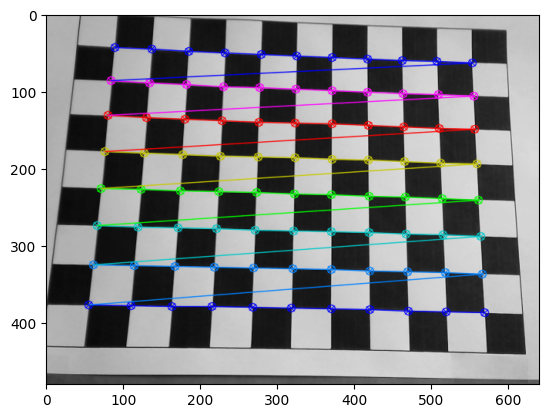

In [383]:
# Get mire_1 corners coord
img = cv2.imread(img_list[0])
corners_pos = np.squeeze(cv2.findChessboardCorners(img,patternSize=[Ny,Nx])[1])
cv2.drawChessboardCorners(img,patternSize = [Ny,Nx], corners = corners_pos, patternWasFound=True)
plt.imshow(img)

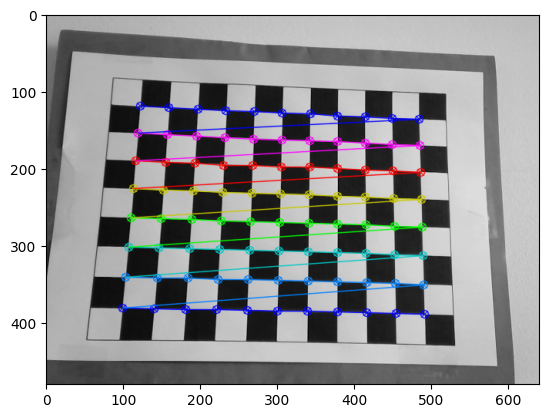

In [384]:
# Get mire_2 corners coord
img_2 = cv2.imread(img_list[1])
corners_pos_2 = np.squeeze(cv2.findChessboardCorners(img_2,patternSize=[Ny,Nx])[1])
cv2.drawChessboardCorners(img_2,patternSize = [Ny,Nx], corners = corners_pos_2, patternWasFound=True)
plt.imshow(img_2)

In [385]:
# Build the coord_px vector
coord_px = np.concatenate([np.flip(corners_pos), np.flip(corners_pos_2)])
print("Coord_px : \n \n",coord_px)

Coord_px : 
 
 [[ 42.74233   88.681854]
 [ 45.0167   137.12468 ]
 [ 47.87287  184.81654 ]
 [ 50.377857 231.97073 ]
 [ 52.10026  278.7067  ]
 [ 54.090847 324.89267 ]
 [ 55.846214 370.96216 ]
 [ 57.813137 416.6611  ]
 [ 59.522266 462.0089  ]
 [ 61.292118 507.49118 ]
 [ 62.609333 552.5713  ]
 [ 86.35369   84.32411 ]
 [ 89.069984 133.82164 ]
 [ 91.47693  182.25935 ]
 [ 93.93152  230.01208 ]
 [ 95.21159  277.22156 ]
 [ 97.34359  324.16678 ]
 [ 98.88648  370.74094 ]
 [100.573494 417.01324 ]
 [102.55206  462.87494 ]
 [104.291695 508.61972 ]
 [105.774635 554.5783  ]
 [131.46962   80.29915 ]
 [133.66515  130.34117 ]
 [136.17955  179.6634  ]
 [138.03224  227.83087 ]
 [139.87222  275.6406  ]
 [141.24475  323.40475 ]
 [142.40625  370.6696  ]
 [144.23119  417.56915 ]
 [146.3572   463.67853 ]
 [148.00198  510.2055  ]
 [149.49472  556.4678  ]
 [177.71082   76.11482 ]
 [180.18948  126.795265]
 [181.81247  176.58322 ]
 [183.61215  225.803   ]
 [185.21533  274.5514  ]
 [186.23082  322.5218  ]
 [187.9444

In [386]:
# Build the coord_mm vector
coord_mm_1 = np.zeros([Nx*Ny,3])
x = 0
for i in range(Nx*Ny) :
    coord_mm_1[i,1] = (x) * box_size
    coord_mm_1[i,0] = (i//Ny) * box_size
    coord_mm_1[i,2] = val[0]
    x += 1 
    if x >= Ny :
        x = 0

coord_mm_2 = coord_mm_1.copy()
for i in range(Nx*Ny) :
    coord_mm_2[i,2] = val[1]

coord_mm = np.concatenate([coord_mm_1, coord_mm_2])

print("Coord_mm : \n \n",coord_mm)


Coord_mm : 
 
 [[   0.    0.    0.]
 [   0.   20.    0.]
 [   0.   40.    0.]
 [   0.   60.    0.]
 [   0.   80.    0.]
 [   0.  100.    0.]
 [   0.  120.    0.]
 [   0.  140.    0.]
 [   0.  160.    0.]
 [   0.  180.    0.]
 [   0.  200.    0.]
 [  20.    0.    0.]
 [  20.   20.    0.]
 [  20.   40.    0.]
 [  20.   60.    0.]
 [  20.   80.    0.]
 [  20.  100.    0.]
 [  20.  120.    0.]
 [  20.  140.    0.]
 [  20.  160.    0.]
 [  20.  180.    0.]
 [  20.  200.    0.]
 [  40.    0.    0.]
 [  40.   20.    0.]
 [  40.   40.    0.]
 [  40.   60.    0.]
 [  40.   80.    0.]
 [  40.  100.    0.]
 [  40.  120.    0.]
 [  40.  140.    0.]
 [  40.  160.    0.]
 [  40.  180.    0.]
 [  40.  200.    0.]
 [  60.    0.    0.]
 [  60.   20.    0.]
 [  60.   40.    0.]
 [  60.   60.    0.]
 [  60.   80.    0.]
 [  60.  100.    0.]
 [  60.  120.    0.]
 [  60.  140.    0.]
 [  60.  160.    0.]
 [  60.  180.    0.]
 [  60.  200.    0.]
 [  80.    0.    0.]
 [  80.   20.    0.]
 [  80.   40.    0.

In [387]:
# Build A
def get_formula(i, j, coord_px, coord_mm) :
    formula = {0 : (coord_px[i,1]-i2)*coord_mm[i,0], 1 : (coord_px[i,1]-i2)*coord_mm[i,1], 
               2 : (coord_px[i,1]-i2)*coord_mm[i,2], 3 : (coord_px[i,1]-i2), 
               4 : -(coord_px[i,0]-i1)*coord_mm[i,0], 5 : -(coord_px[i,0]-i1)*coord_mm[i,1], 
               6 : -(coord_px[i,0]-i1)*coord_mm[i,2]}
    return formula[j]

A = np.zeros([n,7])
for i in range(n):
    for j in range(7):
        A[i,j] = get_formula(i,j,coord_px, coord_mm)

print(A)

[[    -0.             -0.             -0.         ...      0.
       0.              0.        ]
 [    -0.          -3657.50640869     -0.         ...      0.
    3899.66598511      0.        ]
 [    -0.          -5407.33825684     -0.         ...      0.
    7685.08514404      0.        ]
 ...
 [ 13385.78674316  15298.04199219  -9561.27624512 ... -20646.50512695
  -23596.00585938  14747.50366211]
 [ 18749.65637207  24106.7010498  -13392.61169434 ... -20723.53759766
  -26644.54833984  14802.52685547]
 [ 23908.19580078  34154.56542969 -17077.28271484 ... -20879.40124512
  -29827.71606445  14913.85803223]]


In [388]:
# Build U1
U1 = np.zeros([n,1])
for i in range(n):
    U1[i,0] = coord_px[i,0] - i1

print(U1)

[[-1.97257671e+02]
 [-1.94983299e+02]
 [-1.92127129e+02]
 [-1.89622143e+02]
 [-1.87899738e+02]
 [-1.85909153e+02]
 [-1.84153786e+02]
 [-1.82186863e+02]
 [-1.80477734e+02]
 [-1.78707882e+02]
 [-1.77390667e+02]
 [-1.53646309e+02]
 [-1.50930016e+02]
 [-1.48523071e+02]
 [-1.46068481e+02]
 [-1.44788406e+02]
 [-1.42656410e+02]
 [-1.41113518e+02]
 [-1.39426506e+02]
 [-1.37447937e+02]
 [-1.35708305e+02]
 [-1.34225365e+02]
 [-1.08530380e+02]
 [-1.06334854e+02]
 [-1.03820450e+02]
 [-1.01967758e+02]
 [-1.00127777e+02]
 [-9.87552490e+01]
 [-9.75937500e+01]
 [-9.57688141e+01]
 [-9.36428070e+01]
 [-9.19980164e+01]
 [-9.05052795e+01]
 [-6.22891846e+01]
 [-5.98105164e+01]
 [-5.81875305e+01]
 [-5.63878479e+01]
 [-5.47846680e+01]
 [-5.37691803e+01]
 [-5.20556030e+01]
 [-5.07129517e+01]
 [-4.88264160e+01]
 [-4.71927795e+01]
 [-4.55645752e+01]
 [-1.41549988e+01]
 [-1.26877289e+01]
 [-1.11257324e+01]
 [-9.63424683e+00]
 [-8.55693054e+00]
 [-7.01055908e+00]
 [-5.78681946e+00]
 [-4.30924988e+00]
 [-2.5847473

In [389]:
# Build L
A_t = np.transpose(A)
L = np.linalg.inv(A_t @ A) @ A_t @ U1 
# L = np.linalg.pinv(A)@U1

print(L)

[[-9.92250983e-03]
 [-3.28757786e-04]
 [ 1.90342111e-03]
 [ 8.55517122e-01]
 [ 1.98384904e-04]
 [-1.02029459e-02]
 [-9.86978672e-04]]


In [390]:
# Intermediate Parameters
abs_oc2 = 1/np.sqrt(L[4]**2 + L[5]**2 + L[6]**2)[0]
oc2 = oc2_sign * abs_oc2
beta = abs_oc2 * np.sqrt(L[0]**2 + L[1]**2 + L[2]**2)[0]
oc1 = L[3][0] * oc2 / beta
r11 = L[0][0] * oc2 / beta
r12 = L[1][0] * oc2 / beta
r13 = L[2][0] * oc2 / beta
r21 = L[4][0] * oc2
r22 = L[5][0] * oc2
r23 = L[6][0] * oc2
R1 = np.array([r11, r12, r13])
R2 = np.array([r21, r22, r23])

In [391]:
# Rotation matrix parameters
R3 = np.cross(R1, R2)
r31 = R3[0]
r32 = R3[1]
r33 = R3[2]
phi = -np.arctan(r23/r33)
gamma = -np.arctan(r12/r11)
omega = np.arctan(r13/(-r23*np.sin(phi)+r33*np.cos(phi)))
print(R3)

[ 0.19051484 -0.09084991  0.97745986]


In [392]:
# Build U2
U2 = np.zeros([n,1])
for i in range(n):
    U2[i,0] = coord_px[i,1] - i2

print(U2)

[[-231.31814575]
 [-182.87532043]
 [-135.18345642]
 [ -88.02926636]
 [ -41.29330444]
 [   4.89266968]
 [  50.9621582 ]
 [  96.66110229]
 [ 142.00891113]
 [ 187.49118042]
 [ 232.57128906]
 [-235.67588806]
 [-186.17835999]
 [-137.74064636]
 [ -89.98791504]
 [ -42.77844238]
 [   4.16677856]
 [  50.74093628]
 [  97.01324463]
 [ 142.87493896]
 [ 188.61972046]
 [ 234.57830811]
 [-239.70085144]
 [-189.65882874]
 [-140.33659363]
 [ -92.16912842]
 [ -44.35940552]
 [   3.40475464]
 [  50.66958618]
 [  97.56915283]
 [ 143.67852783]
 [ 190.20550537]
 [ 236.46777344]
 [-243.88517761]
 [-193.2047348 ]
 [-143.41677856]
 [ -94.19700623]
 [ -45.4486084 ]
 [   2.52178955]
 [  50.56863403]
 [  97.91030884]
 [ 144.90792847]
 [ 191.68621826]
 [ 238.81750488]
 [-248.58691406]
 [-196.67436218]
 [-146.3961792 ]
 [ -96.38983154]
 [ -47.15032959]
 [   1.77883911]
 [  50.29046631]
 [  98.50820923]
 [ 146.18496704]
 [ 193.68249512]
 [ 240.81433105]
 [-253.64974976]
 [-201.20832825]
 [-149.44659424]
 [ -99.1180877

In [393]:
# Build B
B = np.zeros([n,2])
for i in range(n):
    B[i,0] = U2[i]
    B[i,1] = -(r21*coord_mm[i,0] + r22*coord_mm[i,1] + r23*coord_mm[i,2] + oc2)

print(B)

[[-2.31318146e+02 -9.75372635e+01]
 [-1.82875320e+02 -7.76339150e+01]
 [-1.35183456e+02 -5.77305665e+01]
 [-8.80292664e+01 -3.78272179e+01]
 [-4.12933044e+01 -1.79238694e+01]
 [ 4.89266968e+00  1.97947912e+00]
 [ 5.09621582e+01  2.18828276e+01]
 [ 9.66611023e+01  4.17861762e+01]
 [ 1.42008911e+02  6.16895247e+01]
 [ 1.87491180e+02  8.15928732e+01]
 [ 2.32571289e+02  1.01496222e+02]
 [-2.35675888e+02 -9.79242620e+01]
 [-1.86178360e+02 -7.80209134e+01]
 [-1.37740646e+02 -5.81175649e+01]
 [-8.99879150e+01 -3.82142164e+01]
 [-4.27784424e+01 -1.83108678e+01]
 [ 4.16677856e+00  1.59248070e+00]
 [ 5.07409363e+01  2.14958292e+01]
 [ 9.70132446e+01  4.13991778e+01]
 [ 1.42874939e+02  6.13025263e+01]
 [ 1.88619720e+02  8.12058748e+01]
 [ 2.34578308e+02  1.01109223e+02]
 [-2.39700851e+02 -9.83112604e+01]
 [-1.89658829e+02 -7.84079118e+01]
 [-1.40336594e+02 -5.85045633e+01]
 [-9.21691284e+01 -3.86012148e+01]
 [-4.43594055e+01 -1.86978662e+01]
 [ 3.40475464e+00  1.20548229e+00]
 [ 5.06695862e+01  2

In [394]:
# Build R
R = np.zeros([n])

for i in range(n) :
    R[i] = - U2[i] * (r31 * coord_mm[i,0] + r32 * coord_mm[i,1] + r33 * coord_mm[i,2])

print(R)

[ 0.00000000e+00 -3.32284145e+02 -4.91256219e+02 -4.79847080e+02
 -3.00119455e+02  4.44498622e+01  5.55588927e+02  1.22943140e+03
  2.06423959e+03  3.06604039e+03  4.22581635e+03  8.97995071e+02
  3.71109039e+02  2.42836993e+01 -1.47643003e+02 -1.47914867e+02
  2.19784848e+01  3.59839143e+02  8.64261048e+02  1.53243224e+03
  2.36579828e+03  3.36847089e+03  1.82666275e+03  1.10070307e+03
  5.59465432e+02  1.99970015e+02  1.56411414e+01  4.98591573e+00
  1.66266990e+02  4.97446036e+02  9.93593461e+02  1.66094887e+03
  2.49459063e+03  2.78782470e+03  1.85744945e+03  1.11820537e+03
  5.63288243e+02  1.89197880e+02 -5.91586308e+00 -2.67457762e+01
  1.26118052e+02  4.49953040e+02  9.43497656e+02  1.60941329e+03
  3.78875965e+03  2.64019376e+03  1.69924833e+03  9.43674971e+02
  3.75938718e+02 -1.09508814e+01 -2.18220254e+02 -2.48457304e+02
 -1.03089738e+02  2.15335736e+02  7.05296027e+02  4.83240409e+03
  3.46772201e+03  2.30409095e+03  1.34805445e+03  5.75127335e+02
 -6.31604551e+00 -4.08749

In [395]:
# Find last parameters
[oc3, f2] = np.linalg.inv(B.T@B) @ B.T @ R
s2 = f/f2
f1 = beta * f2
s1 = f/f1

In [396]:
# Print all parameters 

print("Intrisic parameters : \n")
print("oc1 = ", oc1)
print("oc2 = ", oc2)
print("oc3 = ", oc3)
print()
print("phi = ", phi)
print("gamma = ", gamma)
print("omega = ", omega)
print()
print("Extrinsic parameters : \n")
print("f = ", f, "*")
print()
print("s1 = ", s1)
print("s2 = ", s2)
print()
print("i1 = ", i1, "*")
print("i2 = ", i2, "*")

Intrisic parameters : 

oc1 =  84.6311523282635
oc2 =  97.53726354427839
oc3 =  -332.30223700986085

phi =  0.09817052034966853
gamma =  -0.03312040721832585
omega =  0.18941040617192598

Extrinsic parameters : 

f =  4 *

s1 =  0.005061431017493701
s2 =  0.004990480243145407

i1 =  240.0 *
i2 =  320.0 *


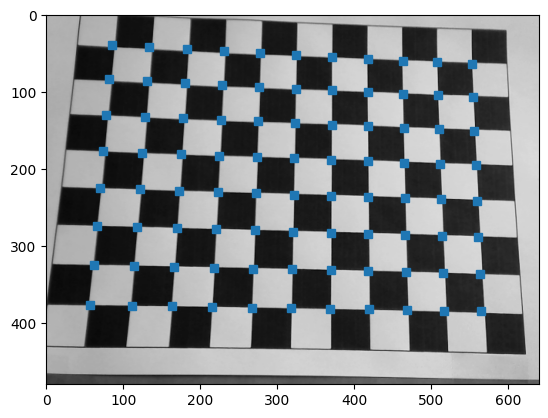

In [402]:
# Correspondance
M_int = np.array([[f/s1, 0, i1, 0],  [0, f/s2, i2, 0], [0, 0, 1, 0]])
M_ext = np.array([[r11, r12, r13, oc1], [r21, r22, r33, oc2], [r31, r32, r33, oc3], [0, 0, 0, 1]])

coord_mm_calibrated = np.empty([Nx * Ny, 4])
for i in range(Nx * Ny) :
    coord_mm_calibrated[i,0] = coord_mm[i,0]
    coord_mm_calibrated[i,1] = coord_mm[i,1]
    coord_mm_calibrated[i,2] = coord_mm[i,2]
    coord_mm_calibrated[i,3] = 1

result = M_int @ M_ext @ coord_mm_calibrated.T
alpha = result[2]

V = np.multiply(result[0], np.reciprocal(alpha))
U = np.multiply(result[1], np.reciprocal(alpha))

img = plt.imread("../data/mire_1.png")
plt.plot(U,V,'s')
plt.imshow(img)
plt.show()